In [1]:
import mne
import numpy as np
import matplotlib.pyplot as plt 

第一步：构建数据 <br>
构建一个大小为10x5x200的三维数组，数组中数据是随机数；<br>
第一维数据表示：10 epochs<br>
第二维数据表示：5 channels<br>
第三维数据表示：2 seconds per epoch<br>



In [2]:
# 采样频率
sfreq = 100
data = np.random.randn(10, 5, sfreq * 2)

# 创建一个info结构
info = mne.create_info(
    ch_names=['MEG1', 'MEG2', 'EEG1', 'EEG2', 'EOG'],
    ch_types=['grad', 'grad', 'eeg', 'eeg', 'eog'],
    sfreq=sfreq
) 


第二步：构建events <br>
在创建Epochs对象时，必须提供一个"events"数组，<br>
事件(event)描述的是某一种波形(症状)的起始点，其为一个三元组，形状为(n_events,3): <br>
    第一列元素以整数来描述的事件起始采样点； <br>
    第二列元素对应的是当前事件来源的刺激通道(stimulus channel)的先前值(previous value),该值大多数情况是0； <br>
    第三列元素表示的是该event的id。<br>


In [3]:
events = np.array([
    [0, 0, 1],
    [1, 0, 2],
    [2, 0, 1],
    [3, 0, 2],
    [4, 0, 1],
    [5, 0, 2],
    [6, 0, 1],
    [7, 0, 2],
    [8, 0, 1],
    [9, 0, 2],
]) 


设置事件的id <br>
如果是dict，则以后可以使用这些键访问关联的事件。示例：dict（听觉=1，视觉=3） <br>
如果是int，将创建一个id为string的dict。<br>
如果是列表，则使用列表中指定ID的所有事件。 <br>
如果没有，则所有事件都将与一起使用，并使用与事件id整数对应的字符串整数名称创建dict。<br>


In [4]:
# 创建event id，受试者或者微笑或者皱眉
event_id = dict(smiling=1, frowning=2)
"""
tmin:event开始前的时间，如果未指定，则默认为0
"""
# 设置事件开始前时间为-0.1s
tmin = -0.1 


10 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
<EpochsArray  |   10 events (all good), -0.1 - 1.89 sec, baseline off, ~93 kB, data loaded,
 'frowning': 5
 'smiling': 5>
Need more than one channel to make topography for grad. Disabling interactivity.


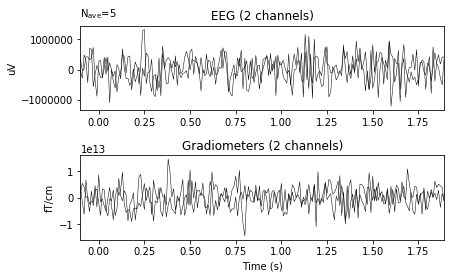

In [5]:
### 第三步：创建epochs对象
"""
利用mne.EpochsArray创建epochs对象
"""
custom_epochs = mne.EpochsArray(data, info, events, tmin, event_id)
print(custom_epochs)
# 绘制
_ = custom_epochs['smiling'].average().plot(time_unit='s') 
